<a href="https://www.kaggle.com/code/vanitech8/ai-powered-job-market?scriptVersionId=199042286" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-powered-job-market-insights/ai_job_market_insights.csv


#  ★ Machine Learning Project - AI-Powered Job Market Insights ★

#                              Strategic Plan of Action
To address the problem statement effectively, we have devised the following plan of action:

**Data Exploration**
* Examine the structure and key characteristics of the dataset.
* Identify important variables and data types.
* Address missing values, outliers, and data inconsistencies.
* Ensure data types are appropriate and formats are standardized.

**Exploratory Data Analysis (EDA)**
* Conduct univariate, bivariate, and multivariate analyses to uncover patterns and relationships in the data.
* Visualize the findings using suitable plots and charts.

**Tools and Libraries**
Python Libraries: Pandas, Matplotlib, Seaborn.

# Import Needed Libraries

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

# Exploring the Data

In [3]:
df=pd.read_csv('/kaggle/input/ai-powered-job-market-insights/ai_job_market_insights.csv')
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


In [4]:
df.columns.tolist()

['Job_Title',
 'Industry',
 'Company_Size',
 'Location',
 'AI_Adoption_Level',
 'Automation_Risk',
 'Required_Skills',
 'Salary_USD',
 'Remote_Friendly',
 'Job_Growth_Projection']

In [5]:
df.shape

(500, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB


In [7]:
df.describe()

,Salary_USD
count,500.000000
mean,91222.390974
std,20504.291453
min,31969.526346
25%,78511.514863
50%,91998.195286
75%,103971.282092
max,155209.821614


**There are not any null value**

In [8]:
df.isna().sum()

Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
len(df.Job_Title.unique())

10

In [11]:
df[df['Job_Title'].duplicated(keep=False)]

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline
...,...,...,...,...,...,...,...,...,...,...
495,Data Scientist,Telecommunications,Medium,Berlin,Low,Medium,Machine Learning,105821.394046,Yes,Stable
496,Cybersecurity Analyst,Telecommunications,Small,London,Low,High,UX/UI Design,119794.992146,No,Decline
497,Cybersecurity Analyst,Energy,Large,Dubai,High,Low,UX/UI Design,79644.933099,Yes,Stable
498,Operations Manager,Healthcare,Large,Paris,High,Low,Python,77642.150625,Yes,Stable


In [12]:
Q1 = df['Salary_USD'].quantile(0.25)
Q3 = df['Salary_USD'].quantile(0.75)
IQR = Q3 - Q1

filtered_data = df[(df['Salary_USD'] >= (Q1 - 1.5 * IQR)) & (df['Salary_USD'] <= (Q3 + 1.5 * IQR))]

df = filtered_data

# Analysis and Visualization

# -Univariate Analysis

**Job Title**

In [13]:
df.head(2)

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline


In [14]:
df.Job_Title.value_counts()

Job_Title
Data Scientist           60
HR Manager               57
Cybersecurity Analyst    54
UX Designer              53
AI Researcher            51
Sales Manager            49
Marketing Specialist     47
Operations Manager       44
Software Engineer        41
Product Manager          39
Name: count, dtype: int64

In [15]:
value_counts = df['Job_Title'].value_counts().reset_index()
value_counts.columns = ['Job_Title', 'Count']
# Create a bar chart
fig = px.bar(
    value_counts,
    x='Job_Title',
    y='Count',
    title='Count of Each Job Title',
    labels={'Count': 'Count', 'Job_Title': 'Job Title'},
    color='Count', 
    color_continuous_scale='Viridis'  
)
# Update layout for better visualization
fig.update_layout(
    xaxis_title='Job Title',
    yaxis_title='Count',
    title_x=0.5,  
    xaxis=dict(
        tickangle=-45  
    )
)

fig.show()


**Industry**

In [16]:
value_counts=df.Industry.value_counts()
value_counts

Industry
Manufacturing         58
Education             57
Technology            56
Finance               52
Telecommunications    52
Energy                49
Entertainment         46
Retail                46
Healthcare            41
Transportation        38
Name: count, dtype: int64

In [17]:
value_counts = value_counts.reset_index()
value_counts.columns = ['Industry', 'Count']
# Create a bar chart
fig = px.bar(
    value_counts,
    y='Industry',
    x='Count',
    title='Count of Each Industry',
    labels={'Count': 'Count', 'Industry': 'Industry'},
    color='Count', 
    color_continuous_scale='Plasma'  
)
# Update layout for better visualization
fig.update_layout(
    xaxis_title='Count',
    yaxis_title='Industry',
    title_x=0.5,  # Center the title
    yaxis=dict(
        tickangle=0  
    )
)

fig.show()


**company_size**

In [18]:
value_counts = df['Company_Size'].value_counts().reset_index()
value_counts

,Company_Size,count
0,Small,169
1,Large,165
2,Medium,161


In [19]:
value_counts.columns = ['Company_Size', 'Count']
# Create a pie chart
fig = px.pie(
    value_counts,
    names='Company_Size',
    values='Count',
    title='Distribution of Company Sizes',
    color='Company_Size',  # Optional: color segments by company size
    color_discrete_map={'Small': 'blue', 'Medium': 'green', 'Large': 'red'}  # Customize colors
)
# Update layout for better visualization
fig.update_layout(
    title_x=0.5 
)

fig.show()

**Location**

In [20]:
df.Location.value_counts()

Location
San Francisco    61
Singapore        53
Sydney           52
Dubai            51
Tokyo            51
New York         48
Berlin           47
London           46
Paris            45
Toronto          41
Name: count, dtype: int64

In [21]:
value_counts = df['Location'].value_counts().reset_index()
value_counts.columns = ['Location', 'Count']

# Create a bar chart
fig = px.bar(
    value_counts,
    x='Location',
    y='Count',
    title='Distribution of Locations',
    labels={'Count': 'Count', 'Location': 'Location'},
    color='Count',  # Optional: color bars by count for better distinction
    color_continuous_scale='Viridis'  # Optional: choose a color scale
)

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Location',
    yaxis_title='Count',
    title_x=0.5,  # Center the title
    xaxis=dict(
        tickangle=-45  # Rotate x-axis labels for better readability
    )
)

# Show the plot
fig.show()

**AI_Adoption_Level**

In [22]:
value_counts=df["AI_Adoption_Level"].value_counts()
value_counts

AI_Adoption_Level
Medium    178
Low       172
High      145
Name: count, dtype: int64

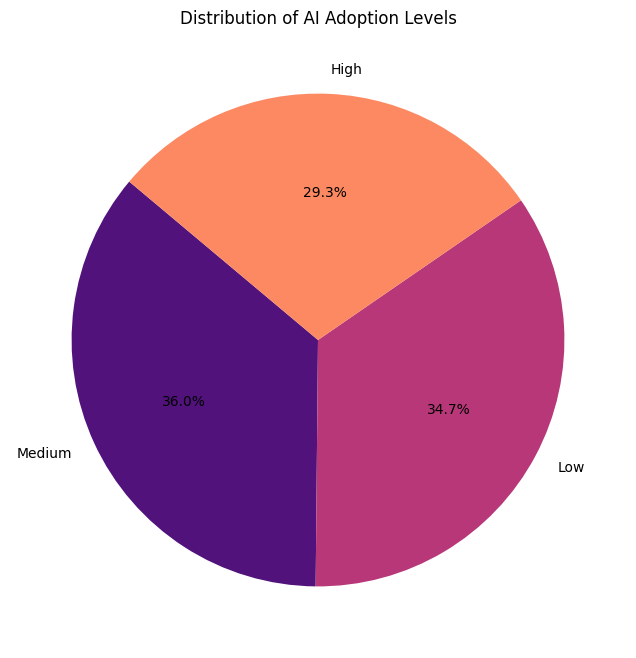

In [23]:
colors = sns.color_palette('magma', len(value_counts))
plt.figure(figsize=(8, 8))
plt.pie(
    value_counts,
    labels=value_counts.index,
    autopct='%1.1f%%',  
    colors=colors,  
    startangle=140  
)
plt.title('Distribution of AI Adoption Levels')
plt.show()

**Automation_Risk**

In [24]:
df.Automation_Risk.value_counts()

Automation_Risk
Medium    171
High      168
Low       156
Name: count, dtype: int64

In [25]:
value_counts = df['Required_Skills'].value_counts().reset_index()
value_counts

,Required_Skills,count
0,Project Management,60
1,Cybersecurity,58
2,Python,58
3,Machine Learning,52
4,UX/UI Design,48
5,Sales,48
6,Data Analysis,48
7,Marketing,45
8,JavaScript,44
9,Communication,34


In [26]:
value_counts.columns = ['Required_Skills', 'Count']
fig = px.pie(
    value_counts,
    names='Required_Skills',
    values='Count',
    title='Distribution of Required Skills',
    color_discrete_sequence=px.colors.sequential.Plasma 
)
fig.update_layout(
    title_x=0.5 
)
fig.show()


**Salary_USD**

In [27]:
df.describe()

,Salary_USD
count,495.000000
mean,91325.220905
std,19741.821674
min,41298.726205
25%,78866.135451
50%,92027.134231
75%,103954.002717
max,140475.995812


In [28]:
df["Salary_USD"].value_counts()

Salary_USD
111392.165243    1
104854.999236    1
97811.878124     1
90737.496084     1
74057.145512     1
                ..
98153.125072     1
98036.517081     1
88155.315907     1
87565.920912     1
68764.378921     1
Name: count, Length: 495, dtype: int64

**There are outliers**

In [29]:
fig = px.box(
    df,
    x='Salary_USD',
    title='Boxplot of Salary (USD)',
    color_discrete_sequence=[' blue']  
)

fig.show()

<Axes: xlabel='Salary_USD', ylabel='Density'>

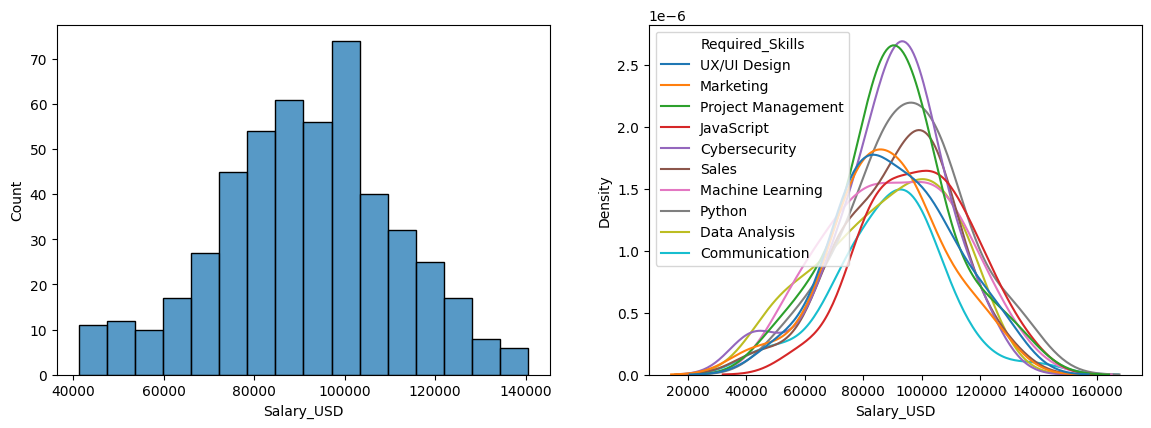

In [30]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.histplot(x='Salary_USD',data = df)

plt.subplot(2, 2, 2)
sns.kdeplot(x='Salary_USD', hue='Required_Skills', data = df)

**Remote_Friendly**

In [31]:
df["Remote_Friendly"].value_counts()

Remote_Friendly
Yes    248
No     247
Name: count, dtype: int64

In [32]:
value_counts = df['Remote_Friendly'].value_counts().reset_index()
value_counts.columns = ['Remote_Friendly', 'Count']
fig = px.pie(
    value_counts, 
    names='Remote_Friendly', 
    values='Count', 
    title='Distribution of Remote Friendly Jobs',
    
)

fig.show()

In [33]:
df.Job_Growth_Projection.value_counts()

Job_Growth_Projection
Growth     168
Decline    167
Stable     160
Name: count, dtype: int64

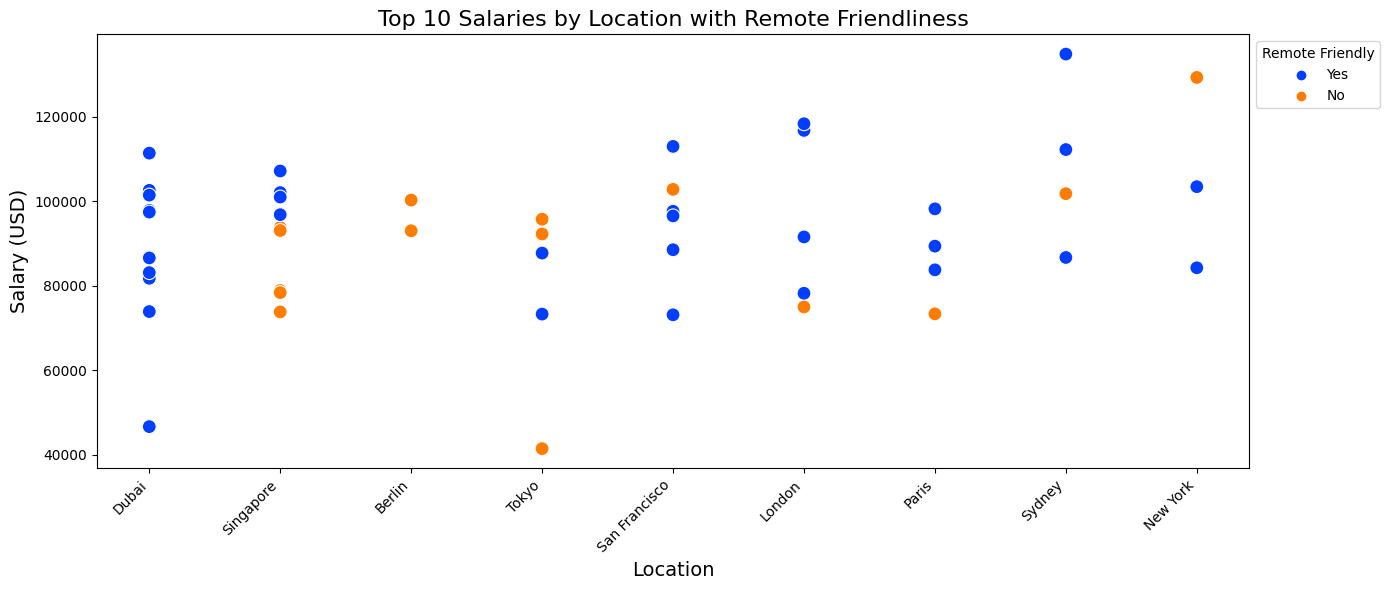

In [34]:
plt.figure(figsize=(14, 6))

sns.scatterplot(
    y=df["Salary_USD"].head(50), 
    x=df["Location"].head(50), 
    hue=df["Remote_Friendly"], 
    palette='bright', s=100
)

plt.title('Top 10 Salaries by Location with Remote Friendliness', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Salary (USD)', fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.legend(title='Remote Friendly', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()


**Conclusion**


The visualizations reveal key trends in the AI job market, such as the prominence of certain industries, the geographical distribution of high-paying jobs, and the potential financial benefits of remote work. These insights can guide job seekers and companies alike in navigating the rapidly evolving landscape of AI employment.

By filtering out outliers and focusing on clear data trends, the analysis provides a robust view of the current AI job market, highlighting opportunities for growth and investment.

**Author**
***shivani sharma***